In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
insurance=pd.read_csv("insurance_data.csv")
insurance.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [8]:
insurance.shape


(1340, 11)

In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
insurance.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [14]:
insurance.age.isna().sum()

5

In [16]:
insurance[insurance.age.isnull()]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45


In [18]:
mean_age=insurance.age.mean()
print(mean_age)

38.07865168539326


In [20]:
insurance.age.fillna(mean_age,inplace=True)

In [22]:
insurance.age.isna().sum()

0

In [24]:
insurance.region.isnull().sum()

3

In [26]:
insurance[insurance.region.isna()]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
13,13,14,32.0,male,27.6,100,No,0,No,NaN,1252.41
14,14,15,40.0,male,28.7,81,Yes,0,No,NaN,1253.94
15,15,16,32.0,male,30.4,86,Yes,0,No,NaN,1256.30


In [28]:
mode_reg=insurance.region.mode()
print(mode_reg)

0    southeast
Name: region, dtype: object


In [30]:
insurance.region.fillna("southeast",inplace=True)

In [32]:
insurance.region.isnull().sum()

0

In [34]:
insurance.drop(columns='index',inplace=True)

BMI

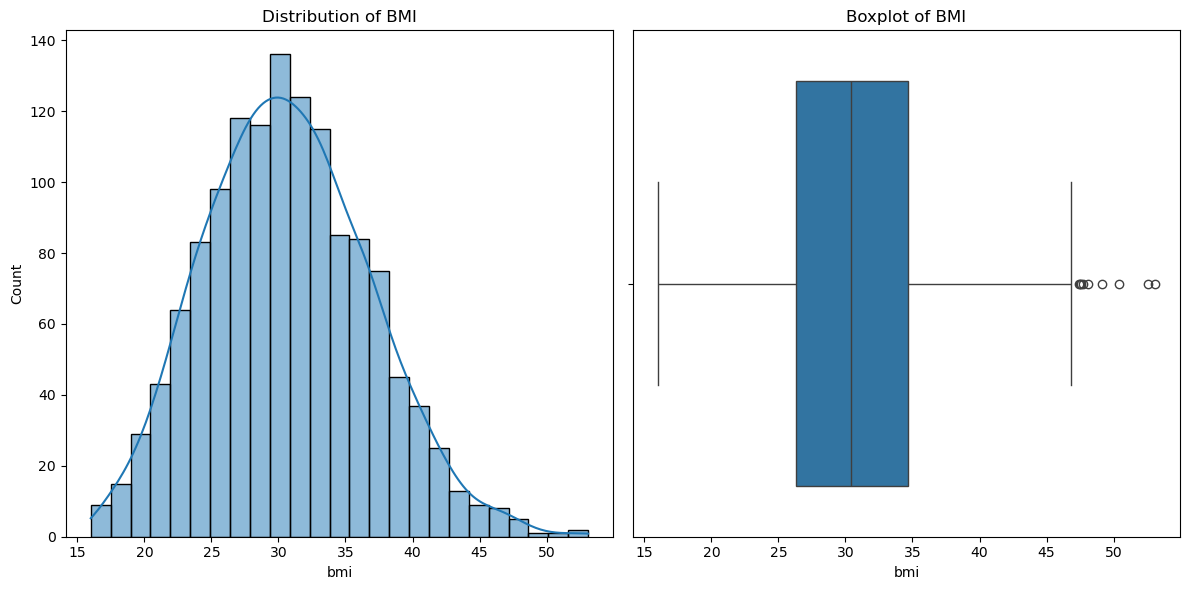

In [37]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,6))
#for histogram
#kde is for the kernel probability distribution line among the bar plots in the first graph
sns.histplot(insurance.bmi, kde=True, ax=axes[0])
axes[0].set_title("Distribution of BMI")
#for boxplot
sns.boxplot(x=insurance.bmi, ax=axes[1])
axes[1].set_title('Boxplot of BMI')
#for minimizing the gaps between the plots we're using tight layout
plt.tight_layout()
plt.show()

In [38]:
#for outliers
l=insurance[insurance.bmi>50].index.to_list()
insurance[insurance.bmi>50]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
1299,1300,50.0,male,52.6,110,No,1,Yes,southeast,44501.40


In [41]:
insurance.drop(index=l,inplace=True)

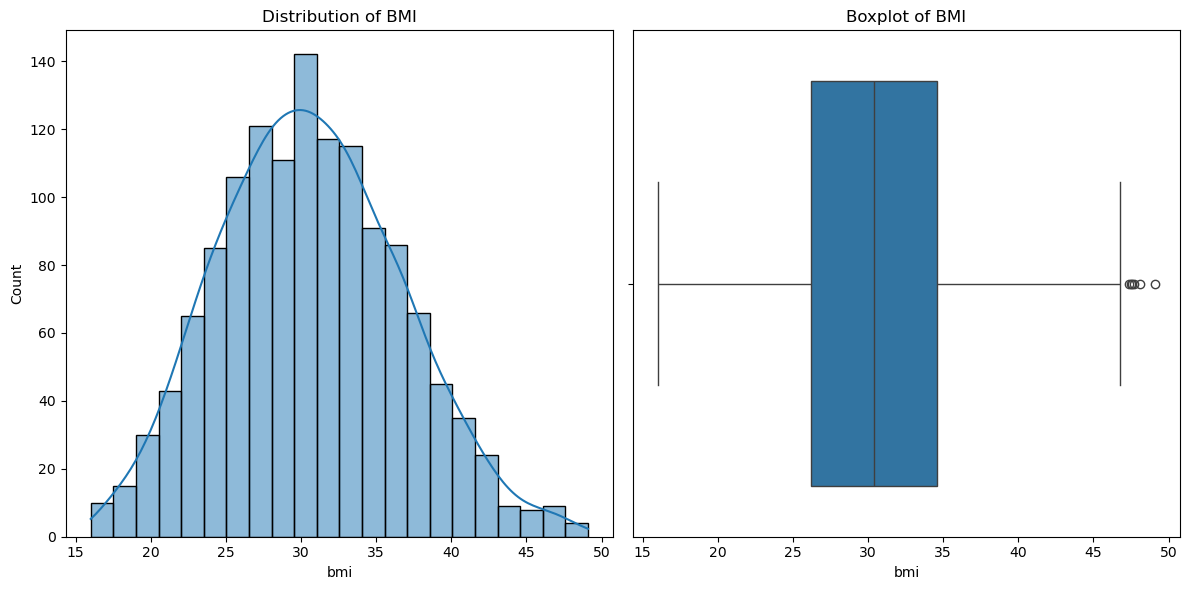

In [43]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,6))
#for histogram
sns.histplot(insurance.bmi, kde=True, ax=axes[0])
axes[0].set_title("Distribution of BMI")
#for boxplot
sns.boxplot(x=insurance.bmi, ax=axes[1])
axes[1].set_title('Boxplot of BMI')

plt.tight_layout()
plt.show()

Blood Pressure

<function matplotlib.pyplot.show(close=None, block=None)>

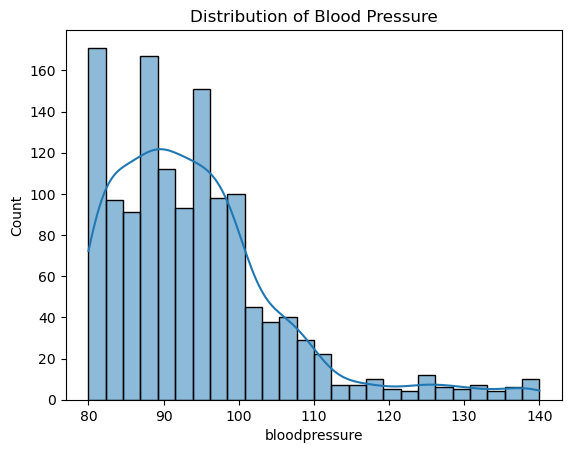

In [46]:
sns.histplot(insurance.bloodpressure,kde=True)
plt.title("Distribution of Blood Pressure")
plt.show

Gender

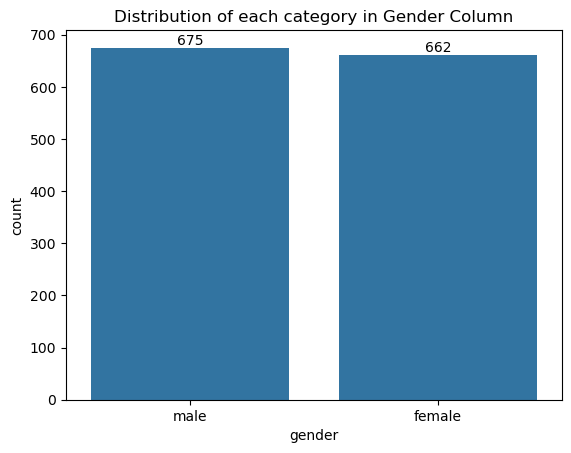

In [49]:
ax=sns.countplot(x=insurance.gender)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of each category in Gender Column")
plt.show()

Diabetes

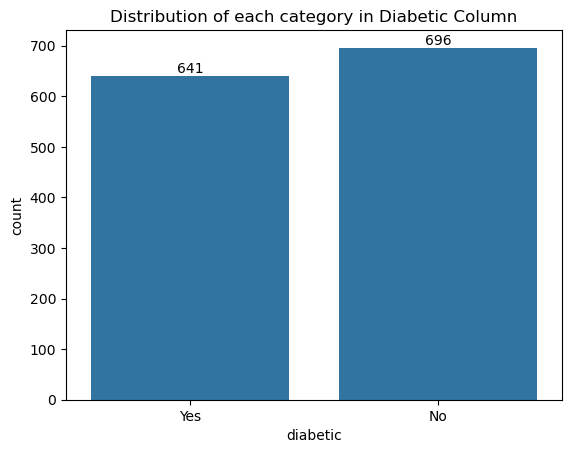

In [52]:
ax=sns.countplot(x=insurance.diabetic)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of each category in Diabetic Column")
plt.show()

Children

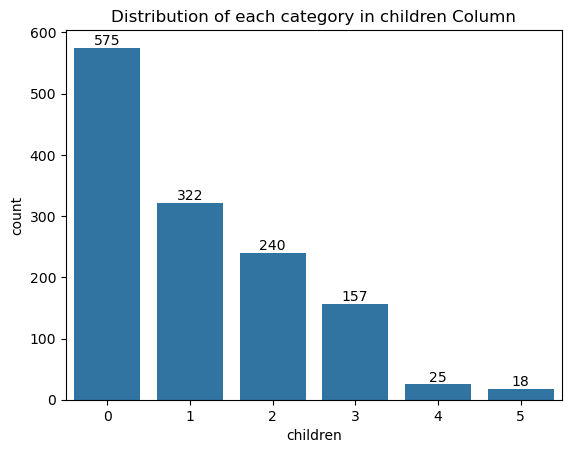

In [55]:
ax=sns.countplot(x=insurance.children)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of each category in children Column")
plt.show()

Smoker

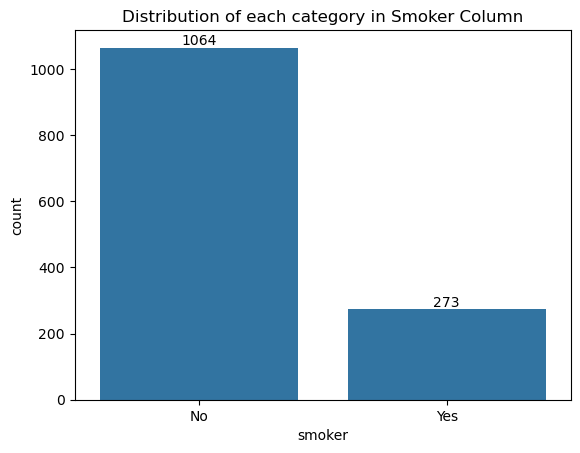

In [58]:
ax=sns.countplot(x=insurance.smoker)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of each category in Smoker Column")
plt.show()

Region

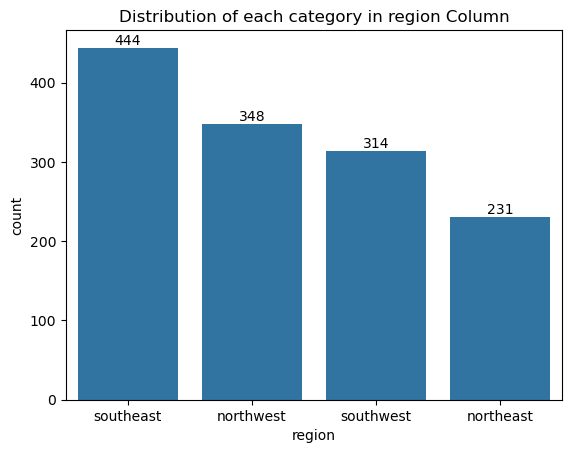

In [61]:
ax=sns.countplot(x=insurance.region)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of each category in region Column")
plt.show()

Claims

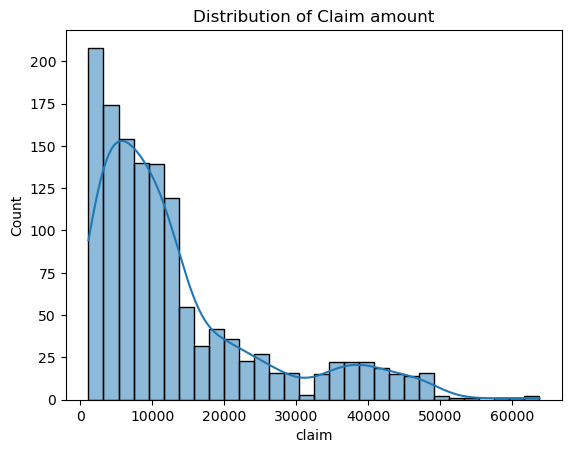

In [64]:
sns.histplot(insurance.claim, kde=True)
plt.title('Distribution of Claim amount')

# Display the plots
plt.show()

Distribution of BMI among different age groups and regions

In [67]:
def agegroup(x):
    if x>=18 and x<29:
        return '18-29'
    elif x>=29 and x<39:
        return '29-39'
    elif x>=39 and x<49:
        return '39-49'
    else:
        return '49-60'
insurance['agegroup']=insurance.age.apply(agegroup)

In [69]:
insurance

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,agegroup
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87,39-49
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51,18-29
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94,29-39
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40,29-39
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01,29-39
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.000000,female,35.5,88,Yes,0,Yes,northwest,55135.40,39-49
1336,1337,59.000000,female,38.1,120,No,1,Yes,northeast,58571.07,49-60
1337,1338,30.000000,male,34.5,91,Yes,3,Yes,northwest,60021.40,29-39
1338,1339,37.000000,male,30.4,106,No,0,Yes,southeast,62592.87,29-39


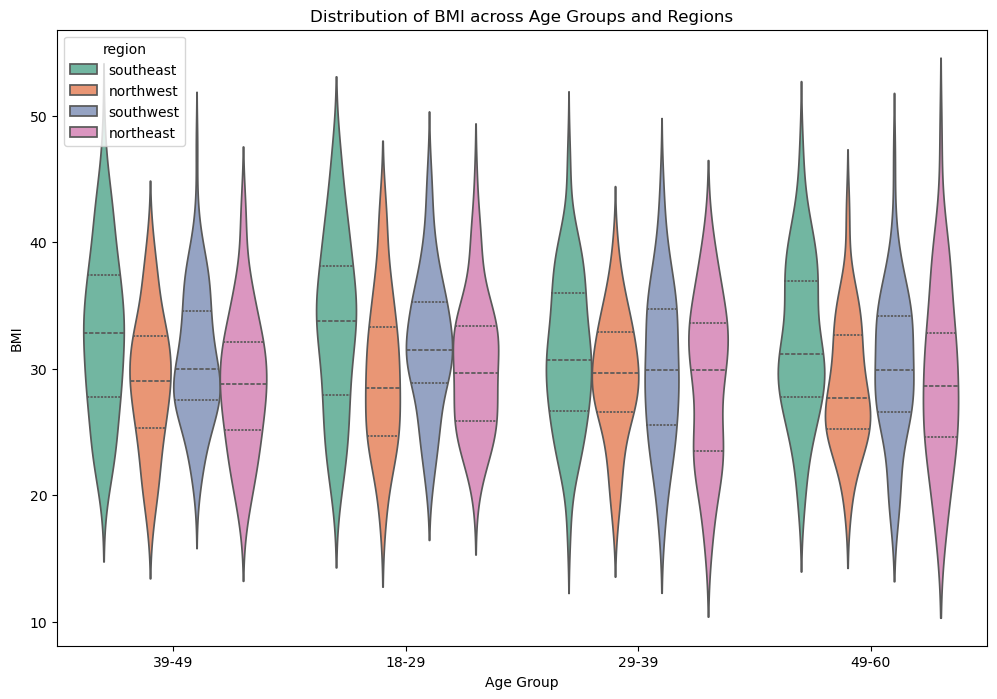

In [71]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='agegroup', y='bmi', hue='region', data=insurance, inner='quart', palette='Set2')
plt.title('Distribution of BMI across Age Groups and Regions')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.show()

Average age of diabetic people across different regions

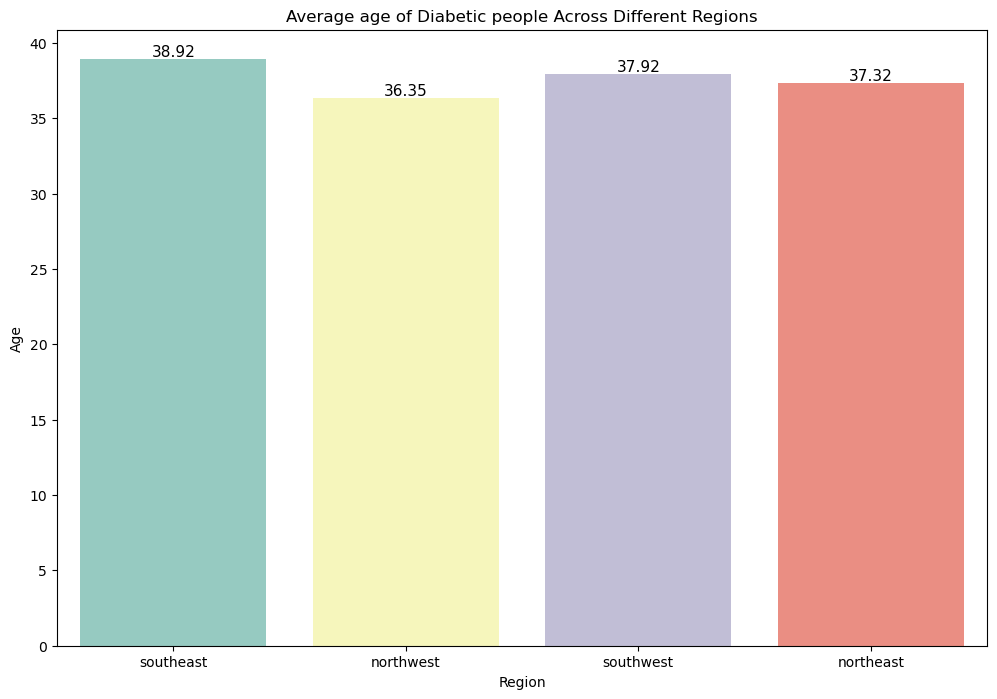

In [74]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='region', y='age', data=insurance[insurance.diabetic=='Yes'], ci=None, palette='Set3')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Average age of Diabetic people Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Age')
plt.show()

Is there a correlation between blood pressure levels and BMI for patients with and without diabetes?

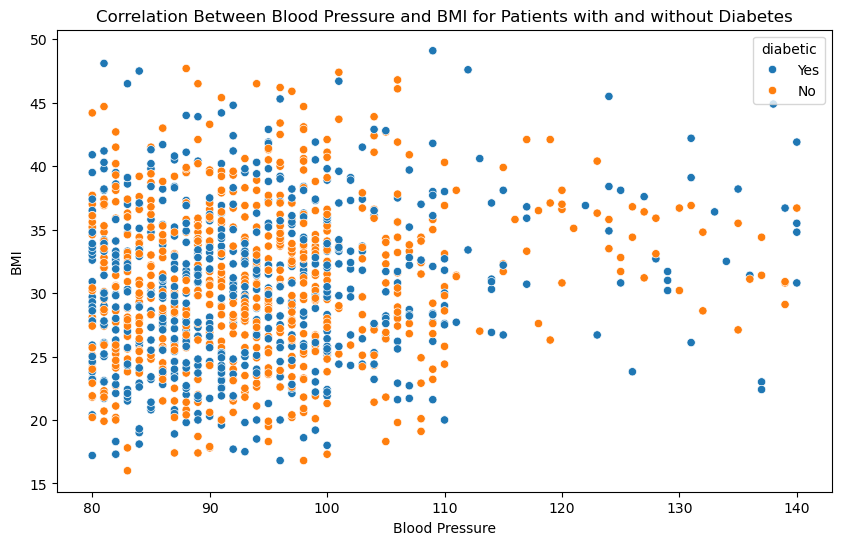

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance, x="bloodpressure", y="bmi", hue="diabetic")
plt.title('Correlation Between Blood Pressure and BMI for Patients with and without Diabetes')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.show()

Does the number of children in a family impact the likelihood of having a diabetic condition?

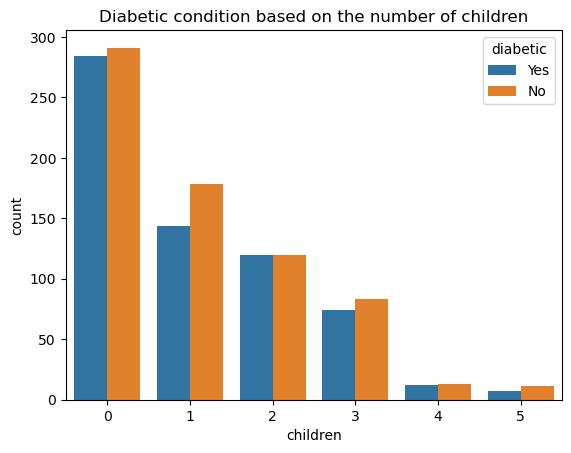

In [80]:
sns.countplot(hue='diabetic',x='children',data=insurance)
plt.title('Diabetic condition based on the number of children')
plt.show()

Average insurance claim amount for different age groups and genders

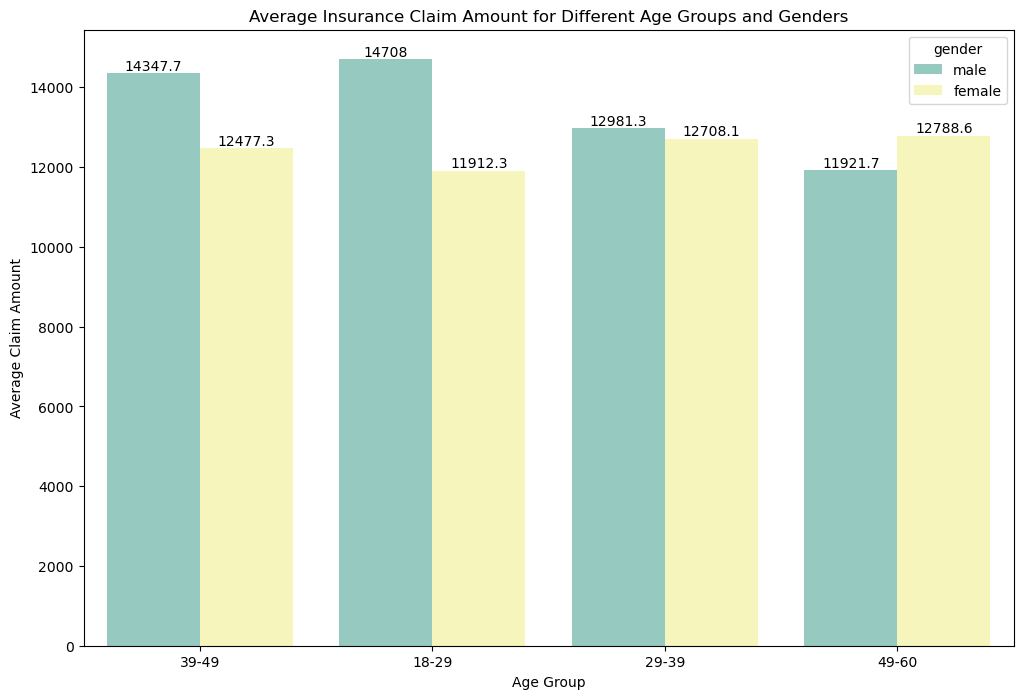

In [83]:
plt.figure(figsize=(12, 8))
ax=sns.barplot(x='agegroup', y='claim', hue='gender', data=insurance, ci=None, palette='Set3')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Average Insurance Claim Amount for Different Age Groups and Genders')
plt.xlabel('Age Group')
plt.ylabel('Average Claim Amount')
plt.show()

Can we identify any specific trends in insurance claims based on smoking habits and regions?

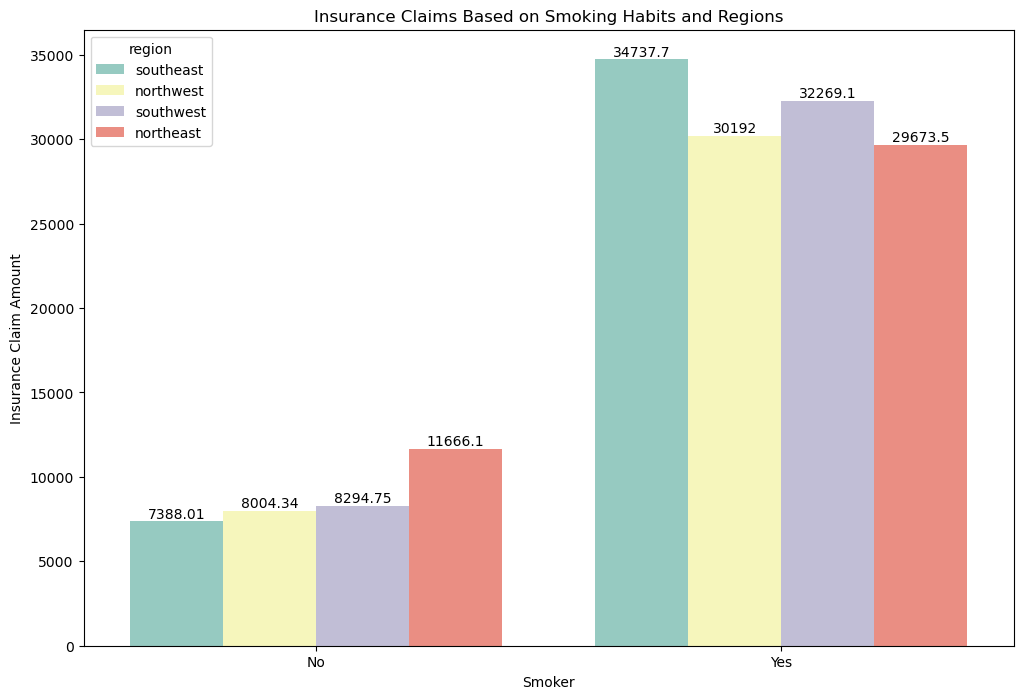

In [86]:
plt.figure(figsize=(12, 8))
ax=sns.barplot(x='smoker', y='claim', hue='region', data=insurance, ci=None, palette='Set3')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Insurance Claims Based on Smoking Habits and Regions')
plt.xlabel('Smoker')
plt.ylabel('Insurance Claim Amount')
plt.show()

Is there a relationship between BMI and the number of children in a family, and does it differ by gender?


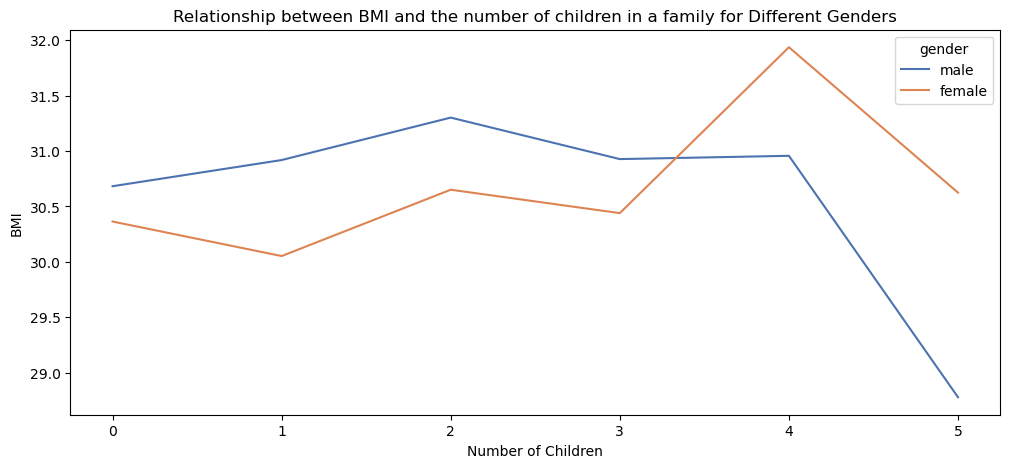

In [89]:
plt.figure(figsize=(12, 5))
ax=sns.lineplot(x='children', y='bmi', hue='gender', data=insurance, ci=None, palette='deep')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Relationship between BMI and the number of children in a family for Different Genders')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()

How do different regions compare in terms of the prevalence of specific health conditions, such as diabetes and high blood pressure?

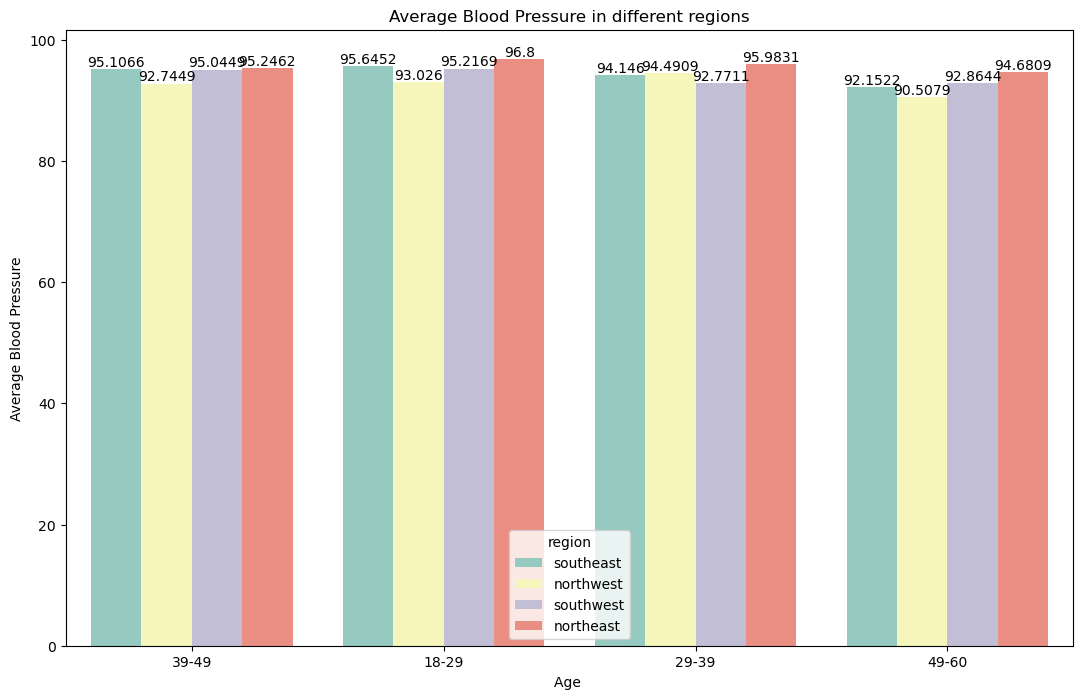

In [92]:
plt.figure(figsize=(13, 8))
ax=sns.barplot(x="agegroup", y="bloodpressure", hue='region', data=insurance, ci=None, palette='Set3')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Average Blood Pressure in different regions')
plt.xlabel('Age ')
plt.ylabel('Average Blood Pressure')
plt.show()

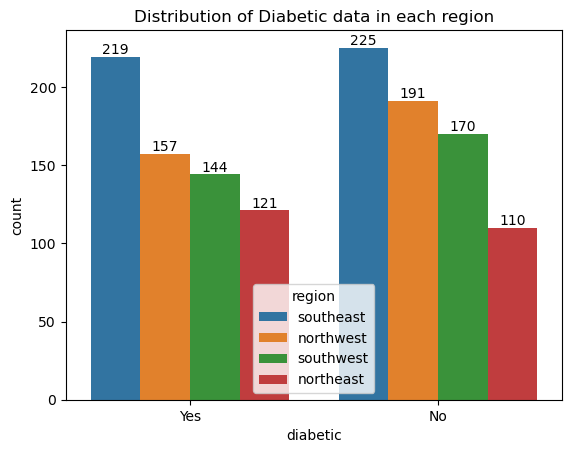

In [195]:
ax=sns.countplot(x=insurance.diabetic,hue=insurance.region)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of Diabetic data in each region")
plt.show()